# TASK

# ===========

## In this notebook, find sections related to supervised machine learning for variables within the Storms Project for the Atlantic basin. It includes:

### -Importing libraries and data
### -Cleaning and wrangling steps
### -Exploratory visual analysis
### -Hypothesis development
### -Test and Training sets 
### -Linear regression models
### -Performance statistics
### -Summary and reflections

# ===========

# Import libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'/Users/matthewschleigh/Desktop/CareerFoundry/Achievement 6/Storms Project'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'storms_cleaned_v3.csv'))

In [5]:
df.head()

,Unnamed: 0,name,year,month,day,hour,latitude,longitude,status,category,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter
0,0,Amy,1975,6,27,0,27.5,-79.0,tropical depression,-1,25,1013,0,0
1,1,Amy,1975,6,27,6,28.5,-79.0,tropical depression,-1,25,1013,0,0
2,2,Amy,1975,6,27,12,29.5,-79.0,tropical depression,-1,25,1013,0,0
3,3,Amy,1975,6,27,18,30.5,-79.0,tropical depression,-1,25,1013,0,0
4,4,Amy,1975,6,28,0,31.5,-78.8,tropical depression,-1,25,1012,0,0


In [6]:
df.shape

(12230, 14)

# Clean your data so that it’s ready for analysis.

## Check missing values

In [12]:
df.isnull().sum()

Unnamed: 0                        0
name                              0
year                              0
month                             0
day                               0
hour                              0
latitude                          0
longitude                         0
status                            0
category                          0
wind_knots                        0
pressure_hpa                      0
trop_storm_force_wind_diameter    0
hurricane_force_wind_diameter     0
dtype: int64

## Check duplicates

In [13]:
dups = df.duplicated()

In [15]:
dups.shape

(12230,)

## Extreme values check

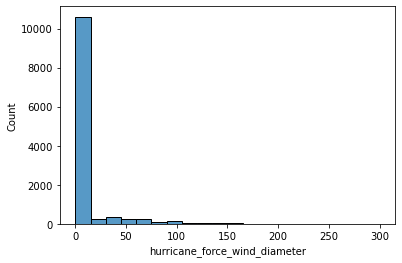

In [16]:
df_hurr_diam = sns.histplot(df['hurricane_force_wind_diameter'], bins=20)

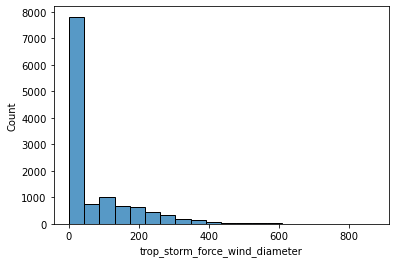

In [18]:
df_trop_diam = sns.histplot(df['trop_storm_force_wind_diameter'], bins=20)

### As discovered previously, there are quite a number of 0's present in both of these categories. It could be prudent to examine their relationships with those values omitted, provided enough observations remain.

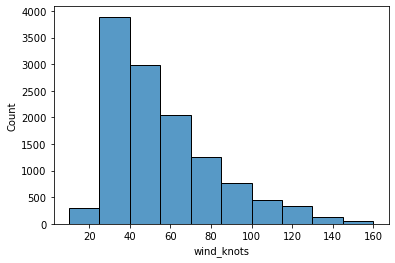

In [19]:
df_wind = sns.histplot(df['wind_knots'], bins=10)

In [20]:
# remove unwanted column

df = df.drop(columns = ['Unnamed: 0'])

In [21]:
df.head()

,name,year,month,day,hour,latitude,longitude,status,category,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter
0,Amy,1975,6,27,0,27.5,-79.0,tropical depression,-1,25,1013,0,0
1,Amy,1975,6,27,6,28.5,-79.0,tropical depression,-1,25,1013,0,0
2,Amy,1975,6,27,12,29.5,-79.0,tropical depression,-1,25,1013,0,0
3,Amy,1975,6,27,18,30.5,-79.0,tropical depression,-1,25,1013,0,0
4,Amy,1975,6,28,0,31.5,-78.8,tropical depression,-1,25,1012,0,0


In [22]:
df.shape

(12230, 13)

# Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

## I'd like to explore the relationship of wind speed to force wind diameter.

<AxesSubplot:xlabel='wind_knots', ylabel='Count'>

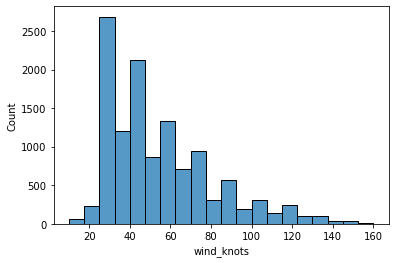

In [46]:
# create a histogram for wind speed

sns.histplot(df['wind_knots'], bins=20)

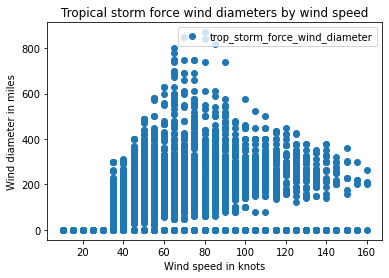

In [47]:
#  Create scatterplot for 'wind_knots' and 'trop_storm_force_wind_diameter'

df.plot(x = 'wind_knots', y='trop_storm_force_wind_diameter',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Tropical storm force wind diameters by wind speed')  
plt.xlabel('Wind speed in knots')  
plt.ylabel('Wind diameter in miles')  
plt.show()

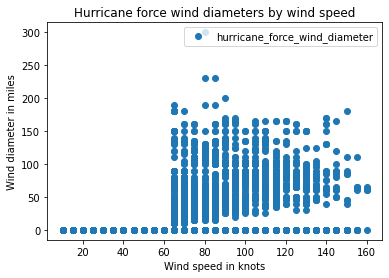

In [48]:
#  Create scatterplot for 'wind_knots' and 'hurricane_force_wind_diameter'

df.plot(x = 'wind_knots', y='hurricane_force_wind_diameter',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Hurricane force wind diameters by wind speed')  
plt.xlabel('Wind speed in knots')  
plt.ylabel('Wind diameter in miles')  
plt.show()

# State your hypothesis in a markdown cell within your Jupyter notebook.

## Looking at these two scatterplots, there's perhaps a slight suggestion of a right skewed correlation, meaning a subtle negative relationship. If a storm's wind speed increases, then its size measured by its wind force decreases.

# Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [49]:
X = df['wind_knots'].values.reshape(-1,1)
y = df['trop_storm_force_wind_diameter'].values.reshape(-1,1)

In [50]:
X

array([[25],
       [25],
       [25],
       ...,
       [35],
       [35],
       [35]])

In [51]:
y

array([[  0],
       [  0],
       [  0],
       ...,
       [100],
       [ 60],
       [ 60]])

# Split the data into two sets: a training set and a test set.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Run a linear regression on the data.
## First, fit the model you created to the training set.
## Then, create a prediction for y on the test set.

In [53]:
# Create regression object

regression = LinearRegression()

In [54]:
# Fit regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [55]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

# Create a plot that shows the regression line on the test set.

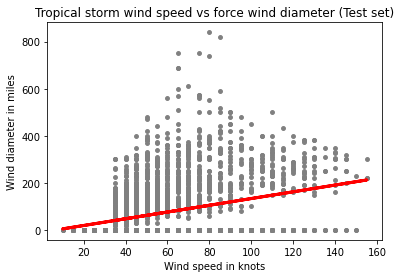

In [56]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Tropical storm wind speed vs force wind diameter (Test set)')
plot_test.xlabel('Wind speed in knots')
plot_test.ylabel('Wind diameter in miles')
plot_test.show()

# Write your own interpretation of how well the line appears to fit the data in a markdown cell.

## According to this chart, the line shows the opposite of what I expected, meaning this regression suggests a small positive relationship between speed and size. The faster the wind, the larger the overall storm. 

# Check the model performance statistics—MSE and R2.

In [57]:
rmse = mean_squared_error(y_test, y_predicted) # mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score. 

In [58]:
# Print the model summary.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.43448277]]
Mean squared error:  11029.603000817126
R2 score:  0.12828843132168355


# Compare the predicted y values with the actual y values in a dataframe.

In [59]:
y_predicted

array([[104.76109416],
       [ 90.41626644],
       [ 33.03695558],
       ...,
       [ 54.55419715],
       [ 47.38178329],
       [ 40.20936944]])

In [60]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,160,104.761094
1,0,90.416266
2,0,33.036956
3,0,140.623163
4,0,54.554197
5,0,83.243853
6,0,90.416266
7,90,61.726611
8,0,25.864542
9,0,47.381783


# Include your thoughts on how well the model performed on the test set in a markdown cell.
## Include any reflections you have on the impact of possible data bias.

## The created dataframe comparing actual to predicted values shows a large discrepancy because of a high prevalence of zero values, suggesting this model is insufficient to determine a correlation of wind speed to size. With this observation and the R2 score being 0.13 (rounded), there is barely any relationship between these variables. However, filtering out the zeros from and combining the force wind diameter columns of tropical storms and hurricanes should provide a more accurate regression between them. This is because wind speed alone determines a storm's classification, meaning any value denoting a tropical storm's diameter would yield a zero within the hurricane diameter column and vice versa, since a storm can only be either one or the other and not both at the same time. 